

# Project: Investigate No-show appointments Dataset


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up


In [1]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshow.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# find the number of patients as rows and their characteristics as columns
df.shape

(110527, 14)

In [4]:
# get info about the data for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- the mean age is 37 years
- Maximum age is 115 years
- there is a mistake about min patient age (-1 years)


### Data Cleaning 

In [6]:
# we have to clean data and filter what we will use to analyis
df.drop(['PatientId' , 'AppointmentID' , 'ScheduledDay' , 'AppointmentDay'] , axis = 1 , inplace=True)
df.head()


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# rename 'No-show' column and correct 'Hipertension' spelling
df.rename(columns={'No-show':'No_show'} , inplace = True)
df.rename(columns={'Hipertension' : 'Hypertension'} , inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis



### General Look 


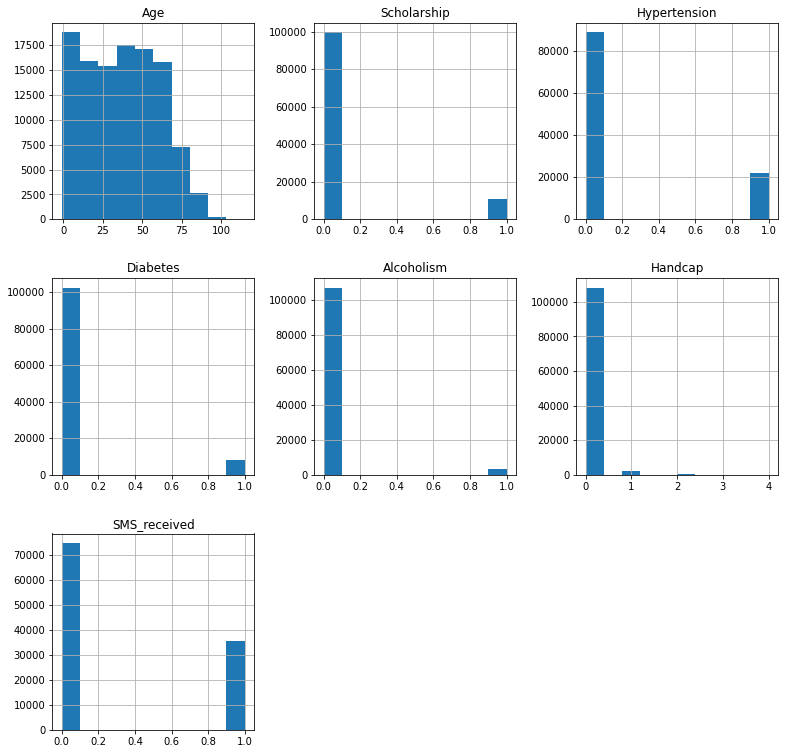

In [8]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize = (13,13));

- most of the patients didn't suffer from chronic diseases nor are handicapped
- about 18% suffered from hypertention
- about 9% are enrolled in the brasillian walfare program
- 50% of patients didn't recieve SMS

In [9]:
# split the no show and show 
show = df.No_show == 'No'
noshow = df.No_show == 'Yes'

In [10]:
df[show].count()

Gender           88208
Age              88208
Neighbourhood    88208
Scholarship      88208
Hypertension     88208
Diabetes         88208
Alcoholism       88208
Handcap          88208
SMS_received     88208
No_show          88208
dtype: int64

In [11]:
df[noshow].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hypertension     22319
Diabetes         22319
Alcoholism       22319
Handcap          22319
SMS_received     22319
No_show          22319
dtype: int64

### Analysing Other Characteristics

In [12]:
# as we are going to plot different relations we can abstract the plot method

def plot_relation(data_frame , title , x ):
    plt.figure(figsize=[15, 8])
    data_frame[show].hist(bins= 4 , color='green' , figsize=(8,8) , label = 'show' )
    data_frame[noshow].hist(bins= 4 , color='red' , figsize=(8,8) , label = 'noshow')
    plt.legend()
    plt.title( 'Comparison bettwen those who showed to who did not according to {}'.format(title) )
    plt.xlabel(x)
    plt.ylabel('Patient Number');

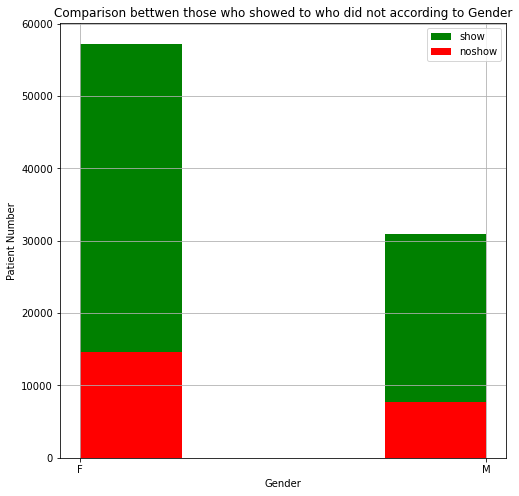

In [13]:
# Compare those who showed to those who didn't according to gender
plot_relation(df.Gender ,'Gender', 'Gender')


In [14]:
print(df.Gender[show].value_counts())
print(df.Gender[noshow].value_counts())

F    57246
M    30962
Name: Gender, dtype: int64
F    14594
M     7725
Name: Gender, dtype: int64


In [15]:
df.groupby('Gender').No_show.value_counts()

Gender  No_show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No_show, dtype: int64

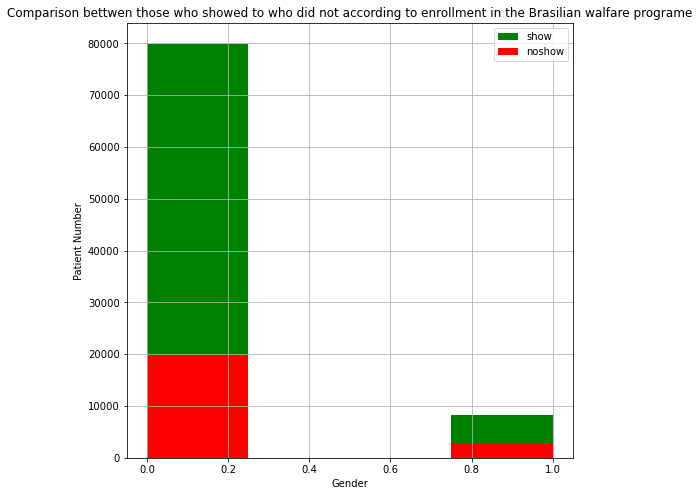

In [16]:
# Compare those who showed to those who didn't acccording to enrollment in the Brasilian walfare programe.
plot_relation(df.Scholarship ,'enrollment in the Brasilian walfare programe', 'Gender' )


- as we can see Enrollment in the Brasilian walfare programe is insignificant

In [17]:
# Compare those who showed to those who didn't acccording to enrollment in the Brasilian walfare programe.

plt.figure(figsize=[15, 8])
print(df.Scholarship[show].value_counts())
print(df.Scholarship[noshow].value_counts())

0    79925
1     8283
Name: Scholarship, dtype: int64
0    19741
1     2578
Name: Scholarship, dtype: int64


<Figure size 1080x576 with 0 Axes>

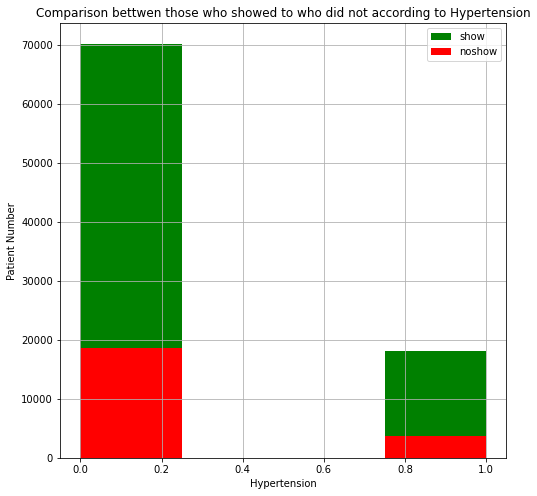

In [18]:
# Compare those who showed to those who didn't acccording to hypertension.
plot_relation(df.Hypertension ,'Hypertension', 'Hypertension')


- as we can see Hypertension is insignificant

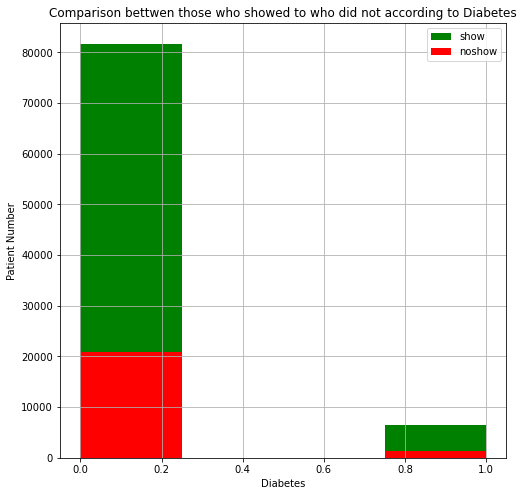

In [19]:
# Compare those who showed to those who didn't acccording to Diabetes.
plot_relation(df.Diabetes ,'Diabetes', 'Diabetes' )


- as we can see Diabetes is insignificant

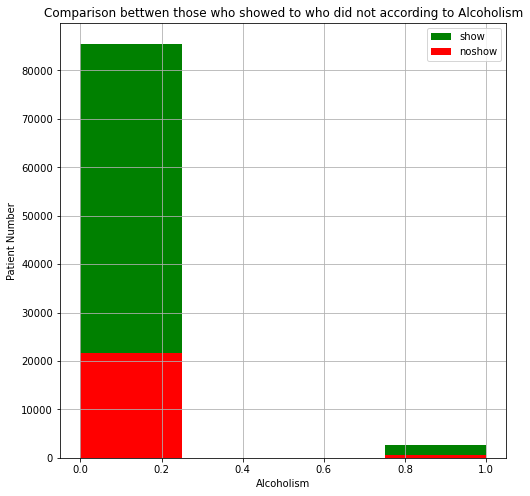

In [20]:
# Compare those who showed to those who didn't acccording to Alcoholism.
plot_relation(df.Alcoholism ,'Alcoholism', 'Alcoholism' )


- as we can see Alcoholism is insignificant

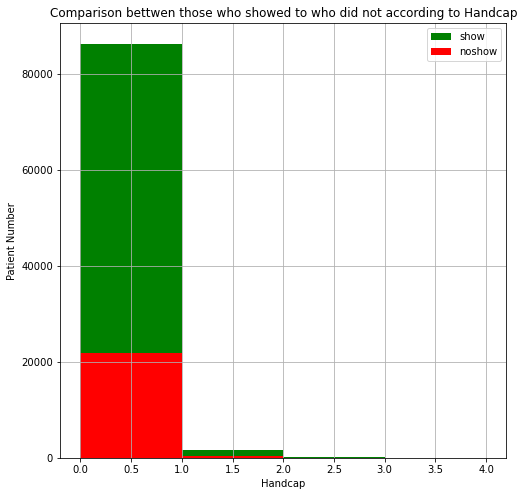

In [21]:
# Compare those who showed to those who didn't acccording to Handcap.
plot_relation(df.Handcap ,'Handcap', 'Handcap' )


- as we can see Handcap is insignificant

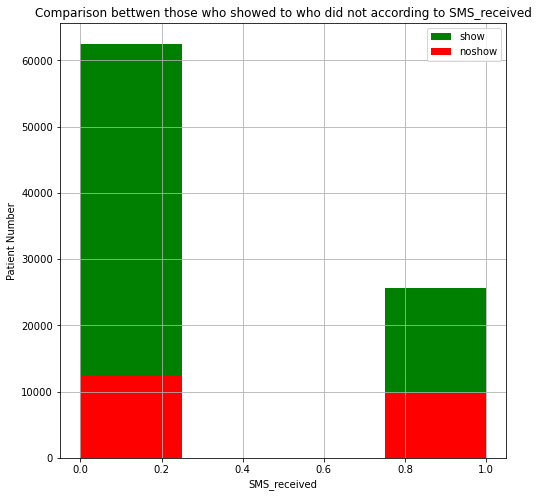

In [22]:
# Compare those who showed to those who didn't acccording to SMS_received.
plot_relation(df.SMS_received ,'SMS_received' , 'SMS_received' )


- we can see that more people showed without receiving an SMS !

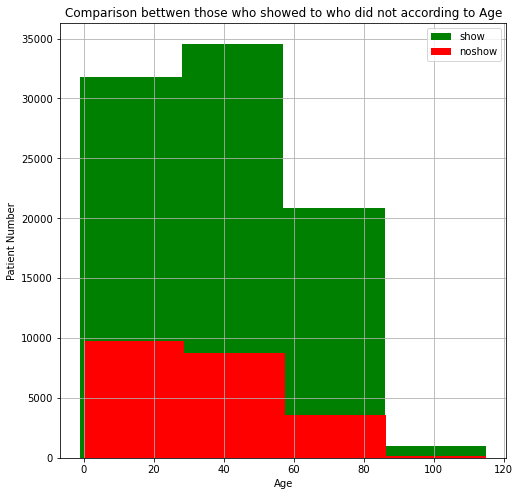

In [23]:
# Compare those who showed to those who didn't acccording to Age .
plot_relation(df.Age ,'Age' , 'Age' )


- Patients in the age group 0 to 10 showed more than all other age group

- the older they get the less they tend to get an appointment in other word after seventy they get less appointment

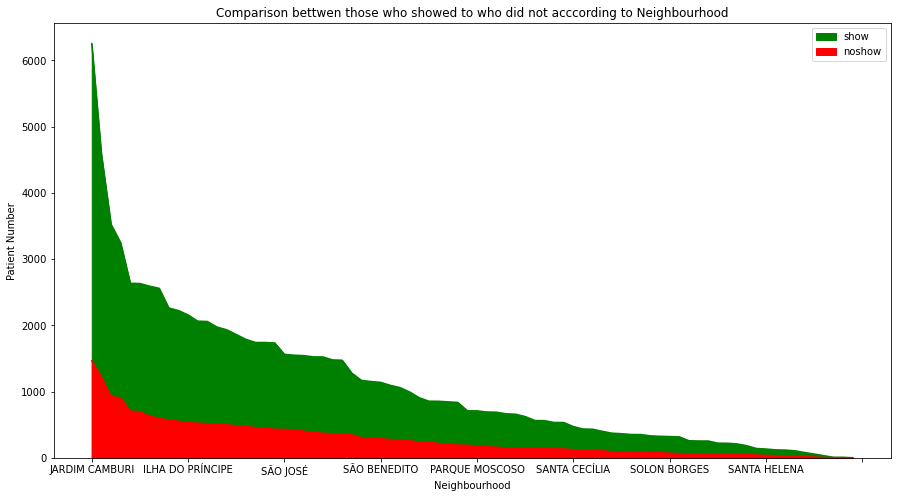

In [24]:
# Compare those who showed to those who didn't acccording to Neighbourhood .
plt.figure(figsize=[15, 8])
df.Neighbourhood[show].value_counts().plot(kind='area'  , color='green', label = 'show')
df.Neighbourhood[noshow].value_counts().plot(kind='area'  , color='red', label = 'noshow')
plt.legend()
plt.title('Comparison bettwen those who showed to who did not acccording to Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patient Number');

- it seems that neiborhood is affecting the showind of patients at the clinic

<a id='conclusions'></a>
## Conclusions

<h4>Results :</h4>


- Neighbourhood is strongly related to the showing of the patients at the clinic.

- age is also related which in the 0-10 age group were the most to show up followed by 35-70.

- more people showed without receiving an SMS than who did received SMS.

<h4>Limitations :</h4>

- we don't have more details for some factors to draw conclusions for example the SMS_received , the data shows the no_show people are mnore likely to receive an SMS but it wasn't clear about when the SMS sent , maybe it was sent to the no-showers or sent after they didn't check in 30 min before the appointment.

- there is no strong correlation between factors.

- most of the varibles are categorical , this does not allow a high level of statistical analyze

- the statistics used are descriptive statistics , not inferential , this means that we didn't create any hypotheses or controlled experiments 




